Saving enhanced_road_safety_dataset.csv to enhanced_road_safety_dataset.csv
Initial Data Preview:
  Accident_ID        Date   Time         Location Weather_Condition  \
0      A10000  2025-01-28  19:12      Sarah Shoal             Clear   
1      A10001  2023-07-02  01:26      Dorsey Isle             Clear   
2      A10002  2025-01-06  13:44     Mark Village             Rainy   
3      A10003  2024-04-05  18:25  Johnson Springs             Rainy   
4      A10004  2023-11-07  06:51     Pamela Ferry              Snow   

  Road_Surface             Light_Condition Traffic_Density Vehicle_Type  \
0          Dry  Night without streetlights          Medium          Car   
1        Snowy     Night with streetlights             Low          Car   
2        Snowy  Night without streetlights            High   Motorcycle   
3        Snowy     Night with streetlights          Medium        Truck   
4          Dry     Night with streetlights          Medium   Motorcycle   

   Driver_Age Driver_Gen

<ipython-input-6-415c9b3e56fb>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Accuracy: 0.855

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.09      0.13        22
           1       0.96      1.00      0.98       136
           2       0.65      0.79      0.71        42

    accuracy                           0.85       200
   macro avg       0.62      0.63      0.61       200
weighted avg       0.82      0.85      0.83       200


Confusion Matrix:
 [[  2   2  18]
 [  0 136   0]
 [  6   3  33]]


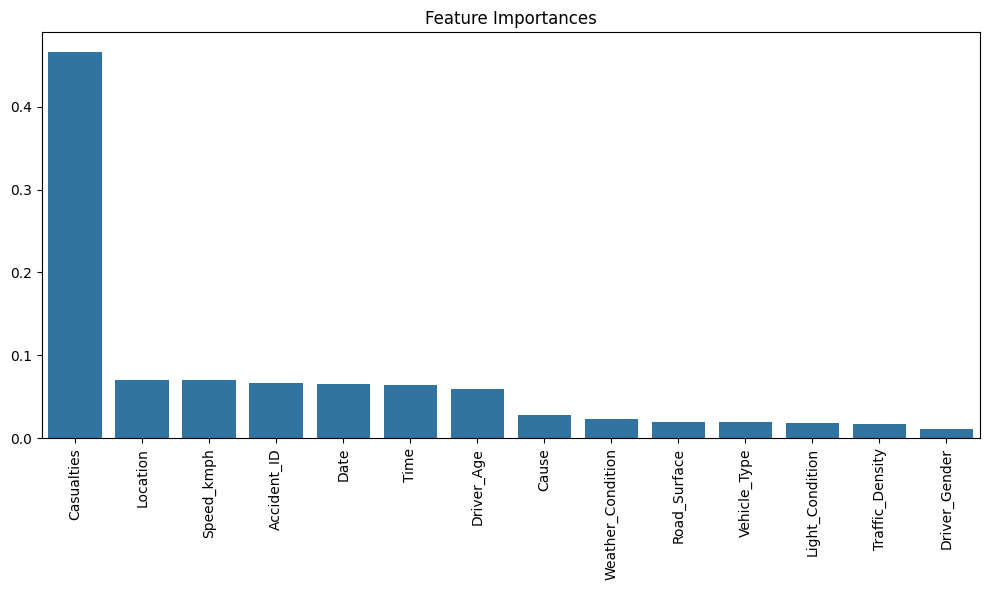

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset (use the correct filename after upload)
df = pd.read_csv("enhanced_road_safety_dataset.csv")
print("Initial Data Preview:")
print(df.head())
print(df.info())

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Define features and target
target = 'Accident_Severity'
X = df.drop(target, axis=1)
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot feature importances
importances = model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=[X.columns[i] for i in indices], y=[importances[i] for i in indices])
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Save model for deployment
joblib.dump(model, 'accident_risk_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(list(X.columns), 'feature_columns.pkl')

# Download files for deployment
files.download('accident_risk_model.pkl')
files.download('label_encoder.pkl')
files.download('feature_columns.pkl')